   0.5% - 7.538e-04 m - 0.0 seconds
   1.0% - 1.508e-03 m - 0.0 seconds
   1.5% - 2.261e-03 m - 0.0 seconds
   2.0% - 3.015e-03 m - 0.0 seconds
   2.5% - 3.769e-03 m - 0.0 seconds
   3.0% - 4.523e-03 m - 0.0 seconds
   3.5% - 5.276e-03 m - 0.0 seconds
   4.0% - 6.030e-03 m - 0.0 seconds
   4.5% - 6.784e-03 m - 0.1 seconds
   5.0% - 7.538e-03 m - 0.1 seconds
   5.5% - 8.291e-03 m - 0.2 seconds
   6.0% - 9.045e-03 m - 0.2 seconds
   6.5% - 9.799e-03 m - 0.2 seconds
   7.0% - 1.055e-02 m - 0.3 seconds
   7.5% - 1.131e-02 m - 0.4 seconds
   8.0% - 1.206e-02 m - 0.4 seconds
   8.5% - 1.281e-02 m - 0.4 seconds
   9.0% - 1.357e-02 m - 0.5 seconds
   9.5% - 1.432e-02 m - 0.5 seconds
  10.1% - 1.508e-02 m - 0.5 seconds
  10.6% - 1.583e-02 m - 0.6 seconds
  11.1% - 1.658e-02 m - 0.6 seconds
  11.6% - 1.734e-02 m - 0.6 seconds
  12.1% - 1.809e-02 m - 0.7 seconds
  12.6% - 1.884e-02 m - 0.7 seconds
  13.1% - 1.960e-02 m - 0.7 seconds
  13.6% - 2.035e-02 m - 0.7 seconds
  14.1% - 2.111e-02 m - 0.7 

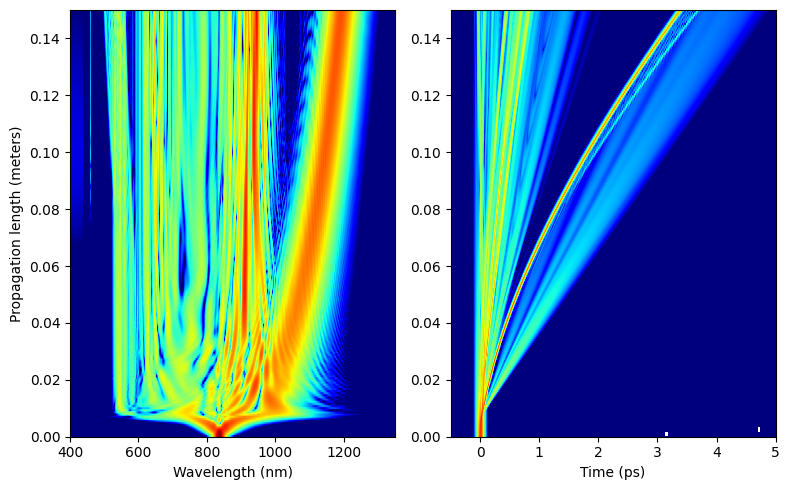

In [1]:
"""Runs a NLSE simulation like Fig.3 of Dudley et. al, RMP 78 1135 (2006)."""

import laserfun as lf
import numpy as np
import matplotlib.pyplot as plt

p = lf.Pulse(pulse_type='sech', power=10000, npts=2**13, fwhm_ps=0.0284*1.76,
             center_wavelength_nm=835, time_window_ps=12.5)

# betas = [beta2, beta3, ...] in units [ps^2/m, ps^3/m ...]
betas = [-11.830e-3, 8.1038e-5, -9.5205e-8, 2.0737e-10,
         -5.3943e-13, 1.3486e-15, -2.5495e-18, 3.0524e-21, -1.7140e-24]

f = lf.Fiber(length=0.15, center_wl_nm=835, dispersion=betas,
             gamma_W_m=0.11)

r = lf.NLSE(p, f, nsaves=200, raman=True)
z, new_wls, t, AW, AT = r.get_results_wavelength(wmin=400, wmax=1350, wn=400,
                                                 datatype='dB')
print(AW)
fig, axs = plt.subplots(1, 2, figsize=(8, 5), tight_layout='True')

axs[0].imshow(AW, aspect='auto', origin='lower',
              extent=(new_wls.min(), new_wls.max(), z.min(), z.max()),
              clim=(np.max(AW)-40, np.max(AW)), cmap='jet')

axs[1].imshow(AT, aspect='auto', origin='lower',
              extent=(t.min(), t.max(), z.min(), z.max()),
              clim=(np.max(AT)-40, np.max(AT)), cmap='jet')

axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Propagation length (meters)')

axs[1].set_xlim(-0.5, 5)
axs[1].set_xlabel('Time (ps)')

if __name__ == '__main__':  # make plots if we're not running tests
    plt.show()